In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
%matplotlib inline

import re
import nltk

In [2]:
df = pd.read_csv("disaster_training.csv")

In [3]:
df.shape

(7613, 5)

In [4]:
df.tail(30)

,id,keyword,location,text,target
7583,10835,NaN,NaN,Pic of 16yr old PKK suicide bomber who detonat...,1
7584,10837,NaN,NaN,These boxes are ready to explode! Exploding Ki...,0
7585,10839,NaN,NaN,Calgary Police Flood Road Closures in Calgary....,1
7586,10840,NaN,NaN,#Sismo DETECTADO #JapÌ_n 15:41:07 Seismic inte...,1
7587,10841,NaN,NaN,Sirens everywhere!,0
7588,10842,NaN,NaN,BREAKING: #ISIS claims responsibility for mosq...,1
7589,10843,NaN,NaN,Omg earthquake,1
7590,10844,NaN,NaN,SEVERE WEATHER BULLETIN No. 5 FOR: TYPHOON ÛÏ...,1
7591,10846,NaN,NaN,Heat wave warning aa? Ayyo dei. Just when I pl...,1
7592,10847,NaN,NaN,An IS group suicide bomber detonated an explos...,1


In [5]:
df.loc[7584,"text"]

'These boxes are ready to explode! Exploding Kittens finally arrived! gameofkittens #explodingkittens\x89Û_ https://t.co/TFGrAyuDC5'

In [6]:
df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [41]:
df["location"].value_counts().head(n = 20)

USA                104
New York            71
United States       50
London              45
Canada              29
Nigeria             28
UK                  27
Los Angeles, CA     26
India               24
Mumbai              22
Washington, DC      21
Kenya               20
Worldwide           19
Chicago, IL         18
Australia           18
California          17
Everywhere          15
California, USA     15
New York, NY        15
San Francisco       14
Name: location, dtype: int64

In [42]:
print("Disaster: ", len(df[df["target"] == 1]))
print("Non-disaster: ", len(df[df["target"] == 0]))

Disaster:  3271
Non-disaster:  4342


/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

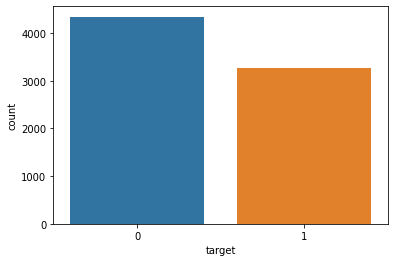

In [43]:
plt.figure()
sns.countplot("target", data = df)

In [44]:
df["text"][7584]

'These boxes are ready to explode! Exploding Kittens finally arrived! gameofkittens #explodingkittens\x89Û_ https://t.co/TFGrAyuDC5'

In [45]:
df["text_clean"] = df["text"].apply(lambda x: x.lower())

In [46]:
print(df["text"][7584])
print(df["text_clean"][7584])

These boxes are ready to explode! Exploding Kittens finally arrived! gameofkittens #explodingkittensÛ_ https://t.co/TFGrAyuDC5
these boxes are ready to explode! exploding kittens finally arrived! gameofkittens #explodingkittensû_ https://t.co/tfgrayudc5


In [47]:
df["text_clean"] = df["text_clean"].apply(lambda x: re.sub(r"https?://\S+|www\.\S+", "", x))

In [48]:
print(df["text"][7584])
print(df["text_clean"][7584])

These boxes are ready to explode! Exploding Kittens finally arrived! gameofkittens #explodingkittensÛ_ https://t.co/TFGrAyuDC5
these boxes are ready to explode! exploding kittens finally arrived! gameofkittens #explodingkittensû_ 


In [49]:
df["text_clean"] = df["text_clean"].apply(lambda x: re.sub(r"[^\x00-\x7f]", "", x))

In [50]:
print(df["text"][7584])
print(df["text_clean"][7584])

These boxes are ready to explode! Exploding Kittens finally arrived! gameofkittens #explodingkittensÛ_ https://t.co/TFGrAyuDC5
these boxes are ready to explode! exploding kittens finally arrived! gameofkittens #explodingkittens_ 


In [51]:
import string

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [52]:
df["text_clean"] = df["text_clean"].apply(lambda x: x.translate(str.maketrans("","",string.punctuation)))

In [53]:
print(df["text"][7584])
print(df["text_clean"][7584])

These boxes are ready to explode! Exploding Kittens finally arrived! gameofkittens #explodingkittensÛ_ https://t.co/TFGrAyuDC5
these boxes are ready to explode exploding kittens finally arrived gameofkittens explodingkittens 


In [54]:
import nltk
nltk.download("stopwords")

from nltk.corpus import stopwords
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /Users/josh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [55]:
stopwords = stopwords.words("english")

df["text_clean"] = df["text_clean"].apply(lambda x: " ".join(word for word in x.split() if word not in (stopwords)))

In [56]:
print(df["text"][7584])
print(df["text_clean"][7584])

These boxes are ready to explode! Exploding Kittens finally arrived! gameofkittens #explodingkittensÛ_ https://t.co/TFGrAyuDC5
boxes ready explode exploding kittens finally arrived gameofkittens explodingkittens


In [57]:
def preprocessing(text):
    text = text.lower()
    text = re.sub(r"https?://\S+|www\.\S+", "", text)
    text = re.sub(r"[^\x00-\x7f]", "", text)
    text = text.translate(str.maketrans("","",string.punctuation))
    text = " ".join(word for word in text.split() if word not in (stopwords))
    
    return text

In [58]:
df["text_clean"] = df["text"].apply(preprocessing)

In [59]:
df.tail(30)

,id,keyword,location,text,target,text_clean
7583,10835,NaN,NaN,Pic of 16yr old PKK suicide bomber who detonat...,1,pic 16yr old pkk suicide bomber detonated bomb...
7584,10837,NaN,NaN,These boxes are ready to explode! Exploding Ki...,0,boxes ready explode exploding kittens finally ...
7585,10839,NaN,NaN,Calgary Police Flood Road Closures in Calgary....,1,calgary police flood road closures calgary
7586,10840,NaN,NaN,#Sismo DETECTADO #JapÌ_n 15:41:07 Seismic inte...,1,sismo detectado japn 154107 seismic intensity ...
7587,10841,NaN,NaN,Sirens everywhere!,0,sirens everywhere
7588,10842,NaN,NaN,BREAKING: #ISIS claims responsibility for mosq...,1,breaking isis claims responsibility mosque att...
7589,10843,NaN,NaN,Omg earthquake,1,omg earthquake
7590,10844,NaN,NaN,SEVERE WEATHER BULLETIN No. 5 FOR: TYPHOON ÛÏ...,1,severe weather bulletin 5 typhoon hannaph soud...
7591,10846,NaN,NaN,Heat wave warning aa? Ayyo dei. Just when I pl...,1,heat wave warning aa ayyo dei plan visit frien...
7592,10847,NaN,NaN,An IS group suicide bomber detonated an explos...,1,group suicide bomber detonated explosivespacke...


In [60]:
x = df["text_clean"]
y = df["target"]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [61]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(x_train)
x_train_vec = vectorizer.transform(x_train)
x_test_vec = vectorizer.transform(x_test)

In [62]:
x_train_vec

<5329x14144 sparse matrix of type '<class 'numpy.int64'>'
	with 47993 stored elements in Compressed Sparse Row format>

In [63]:
print(x_train_vec.shape)

(5329, 14144)


In [64]:
A = x_train_vec.todense()
print(A.shape)

(5329, 14144)


In [65]:
print(A)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [66]:
print(x_train_vec)

  (0, 118)	1
  (0, 1972)	1
  (0, 7119)	1
  (0, 8436)	1
  (0, 10548)	1
  (0, 10961)	1
  (0, 11081)	1
  (0, 11418)	1
  (0, 12094)	1
  (0, 13366)	1
  (1, 798)	1
  (1, 4657)	1
  (1, 5722)	1
  (1, 7830)	1
  (1, 8109)	1
  (1, 9712)	1
  (1, 10019)	1
  (1, 10975)	1
  (1, 11352)	1
  (2, 1170)	1
  (2, 3522)	1
  (2, 3620)	1
  (2, 4122)	1
  (2, 5710)	1
  (2, 5888)	1
  :	:
  (5326, 2387)	1
  (5326, 4117)	1
  (5326, 12232)	1
  (5327, 2074)	1
  (5327, 2128)	1
  (5327, 5103)	1
  (5327, 5760)	1
  (5327, 7103)	1
  (5327, 7470)	1
  (5327, 8725)	1
  (5327, 9353)	1
  (5327, 9652)	1
  (5327, 10484)	1
  (5327, 10725)	1
  (5327, 11189)	1
  (5327, 12737)	1
  (5327, 13560)	1
  (5327, 13629)	1
  (5328, 1439)	1
  (5328, 4947)	1
  (5328, 4954)	1
  (5328, 7828)	1
  (5328, 9850)	1
  (5328, 13739)	1
  (5328, 13841)	1


In [67]:
sparsity = 1.0 - np.count_nonzero(A) / A.size
print(sparsity)

0.9993632632297113


In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

rf = RandomForestClassifier()
rf_model = rf.fit(x_train_vec, y_train)

y_pred = rf_model.predict(x_test_vec)

print(rf.score(x_train_vec, y_train))

0.9887408519422031


In [69]:
print(accuracy_score(y_test, y_pred))

0.7793345008756567
